In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
%matplotlib inline

In [5]:
t = Table.read('data/HMQ.fits')  # assuming you have the file in this directory
t

RA,DEC,NAME,TYPE,RMAG,BMAG,COM,R,B,Z,CITE,ZCITE,XRAY,RADIO,LOBE1,LOBE2
float64,float64,bytes25,bytes4,float32,float32,bytes3,bytes1,bytes1,float32,int16,int16,bytes22,bytes22,bytes22,bytes22
0.0018983,17.7737391,SDSS J000000.45+174625.4,Q,22.1,21.9,g,-,-,2.309,1411,1411,,,,
0.0027564,14.9746755,SDSS J000000.66+145828.8,Q,20.7,21.2,jm,-,1,2.497,1411,1411,,,,
0.0040524,4.8297806,SDSS J000000.97+044947.2,Q,19.3,19.9,j,1,n,1.619,1410,1411,,,,
0.005277,7.024644,KX 208,Q,18.3,18.6,p,-,-,1.227,1135,1135,,,,
0.005317,-2.0332733,FBQS J00000-0202,QR,19.7,21.0,p,-,-,1.36,145,1411,,FIRST J000001.2-020200,,
0.0057462,-1.3250088,SDSS J000001.37-011930.0,Q,19.7,20.9,p,-,-,2.328,1411,1411,,,,
0.0058334,-30.6075,2QZ J000001.3-303627,Q,18.9,20.1,p,-,-,1.143,447,447,,,,
0.0059121,20.0122585,SDSS J000001.41+200044.1,Q,19.4,21.7,p,n,-,3.09,1411,1411,,,,
0.0068188,30.5193561,SDSS J000001.63+303109.6,Q,21.8,21.9,g,-,-,2.377,1411,1411,,,,


In [3]:
# Get only the relevant columns. Later I can include the 
#  information in the comments, for filtering purposes
relevant = t['RA', 'DEC', 'TYPE', 'RMAG', 'BMAG', 'Z']
obj_by_type = relevant.group_by('TYPE')

In [4]:
# How many differnt type classes there are?
# for row in obj_by_type.groups.keys:
#     print(row.as_void())
print(len(obj_by_type.groups.keys))

39


In [5]:
print(t['R'][1],type(t['R'][1])) # missing entries are indicated through the '-' string.

- <class 'str'>


In [6]:
# How many objects are in each class?
group_indices = obj_by_type.groups.indices
for i, key in enumerate(obj_by_type.groups.keys['TYPE']):
    freq  = '{:d}, Class: {:s}, Number of objects: {:d}'.format(i, key, group_indices[i + 1] - group_indices[i])
    print(freq)
    

0, Class: A   , Number of objects: 16261
1, Class: A2  , Number of objects: 108
2, Class: A2X , Number of objects: 37
3, Class: AR  , Number of objects: 3987
4, Class: AR2 , Number of objects: 73
5, Class: AR2X, Number of objects: 38
6, Class: ARX , Number of objects: 1296
7, Class: AX  , Number of objects: 4823
8, Class: B   , Number of objects: 75
9, Class: B2  , Number of objects: 5
10, Class: B2X , Number of objects: 3
11, Class: BR  , Number of objects: 518
12, Class: BR2 , Number of objects: 2
13, Class: BR2X, Number of objects: 3
14, Class: BRX , Number of objects: 907
15, Class: BX  , Number of objects: 82
16, Class: K   , Number of objects: 26024
17, Class: K2  , Number of objects: 144
18, Class: K2X , Number of objects: 31
19, Class: KR  , Number of objects: 4120
20, Class: KR2 , Number of objects: 76
21, Class: KR2X, Number of objects: 20
22, Class: KRX , Number of objects: 481
23, Class: KX  , Number of objects: 1887
24, Class: Q   , Number of objects: 376376
25, Class: Q2 

In [25]:
# I am including the photometrically selected quasars (q label)
quasars = obj_by_type[obj_by_type.groups.indices[24]:]
quasars

RA,DEC,TYPE,RMAG,BMAG,Z
float64,float64,bytes4,float32,float32,float32
0.0018983,17.7737391,Q,22.1,21.9,2.309
0.0027564,14.9746755,Q,20.7,21.2,2.497
0.0040524,4.8297806,Q,19.3,19.9,1.619
0.005277,7.024644,Q,18.3,18.6,1.227
0.0057462,-1.3250088,Q,19.7,20.9,2.328
0.0058334,-30.6075,Q,18.9,20.1,1.143
0.0059121,20.0122585,Q,19.4,21.7,3.09
0.0068188,30.5193561,Q,21.8,21.9,2.377
0.0072223,-31.3736112,Q,19.9,20.6,1.331


Let's see how the data is distributed across the sky

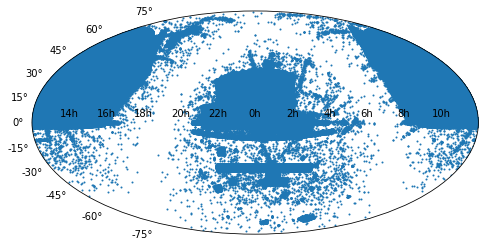

In [8]:
import astropy.coordinates as coord
import astropy.units as u
ra = coord.Angle(quasars['RA'].filled(np.nan)*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(quasars['DEC'].filled(np.nan)*u.degree)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra.radian, dec.radian, s=1)
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h']);

In [2]:
def brighter_than(table, rmag, bmag=np.inf):
    """ Filter table by brightness. Default behaviour is 
    cutting everything dimmer than rmag in the red channel.
    A joint blue magnitude threshold can be applied.
    """
    red_cut = table['RMAG'] < rmag
    blue_cut = table['BMAG'] < bmag
    indices = np.where(np.logical_and(red_cut, blue_cut))[0]
    return table[indices]

# brighter = brighter_than(quasars, 20., 20.)
# brighter

In [4]:
# Get only those with an SDSS identifier
# Not so proud of this script, it is quite slow
import re
r = re.compile('SDSS*')
vmatch = np.vectorize(lambda x: bool(r.match(x)))
only_sdss = np.where(vmatch(t['NAME'].pformat(max_lines=999999, show_name=False))) #The pformat method converts the table to a list of stings, this is the bottleneck

NameError: name 't' is not defined

In [47]:
# Now, further filtering
sdss_sources = t[only_sdss]['RA', 'DEC', 'NAME', 'TYPE', 'RMAG', 'BMAG', 'Z']

# How many objects are in each class?
obj_by_type = sdss_sources.group_by('TYPE')
group_indices = obj_by_type.groups.indices
for i, key in enumerate(obj_by_type.groups.keys['TYPE']):
    freq  = '{:d}, Class: {:s}, Number of objects: {:d}'.format(i, key, group_indices[i + 1] - group_indices[i])
    print(freq)

0, Class: A   , Number of objects: 12237
1, Class: A2  , Number of objects: 90
2, Class: A2X , Number of objects: 7
3, Class: AR  , Number of objects: 2332
4, Class: AR2 , Number of objects: 50
5, Class: AR2X, Number of objects: 13
6, Class: ARX , Number of objects: 270
7, Class: AX  , Number of objects: 2613
8, Class: B   , Number of objects: 11
9, Class: BR  , Number of objects: 201
10, Class: BR2 , Number of objects: 2
11, Class: BRX , Number of objects: 181
12, Class: BX  , Number of objects: 1
13, Class: K   , Number of objects: 17952
14, Class: K2  , Number of objects: 117
15, Class: K2X , Number of objects: 7
16, Class: KR  , Number of objects: 2050
17, Class: KR2 , Number of objects: 56
18, Class: KR2X, Number of objects: 11
19, Class: KRX , Number of objects: 74
20, Class: KX  , Number of objects: 754
21, Class: Q   , Number of objects: 335983
22, Class: Q2  , Number of objects: 590
23, Class: Q2X , Number of objects: 83
24, Class: QR  , Number of objects: 14524
25, Class: QR2

In [48]:
# I am including the photometrically selected quasars (q label)
quasars = obj_by_type[obj_by_type.groups.indices[21]:]
quasars

RA,DEC,NAME,TYPE,RMAG,BMAG,Z
float64,float64,bytes25,bytes4,float32,float32,float32
0.0018983,17.7737391,SDSS J000000.45+174625.4,Q,22.1,21.9,2.309
0.0027564,14.9746755,SDSS J000000.66+145828.8,Q,20.7,21.2,2.497
0.0040524,4.8297806,SDSS J000000.97+044947.2,Q,19.3,19.9,1.619
0.0057462,-1.3250088,SDSS J000001.37-011930.0,Q,19.7,20.9,2.328
0.0059121,20.0122585,SDSS J000001.41+200044.1,Q,19.4,21.7,3.09
0.0068188,30.5193561,SDSS J000001.63+303109.6,Q,21.8,21.9,2.377
0.0075785,14.1973854,SDSS J000001.81+141150.5,Q,20.7,21.8,3.711
0.0080667,-0.2409708,SDSS J000001.93-001427.4,Q,20.2,20.6,2.163
0.0085548,34.6786817,SDSS J000002.05+344043.2,Q,21.9,21.9,1.576


In [49]:
quasars.write('data/quasars_from_sdss.xml', format='votable')

In [5]:
mqc = Table.read('data/milliquas_sdss_only_qsos_brighter20rmag.fits', format='fits')

In [7]:
mqc['QSO_PROB'].min()

81

In [8]:
mqc.write('data/milliquas_sdss_only_qsos_brighter20rmag.xml', format='votable')

In [1]:
7200 / 60

120.0

From now on, I'll be working with the crossmatched data from Gaia

In [60]:
!head data/gaia2Xmqcv52_only_sdss.csv -n 20

# This table contains
# Confirmed (Q) and photometric candidates (q) of SDSS QSOs
# from the Million Quasar Catalog v. 5.2 (as taken from VizieR) with a match in the Gaia DR2
# "source" catalog. 
# 	Crossmatch radius: 1"
# 	Similar magnitudes: GRP mag and  GBP mag must lie within 4 magnitudes 
# 	  around the Red and Blue MQC magnitudes respectively
# 	Redshift: not null
# 	QSO probability: greater than 80%
# 	Red Magnitude (MQC) < 20
# Included columns:
# Dummy index, SDSS Name (based on position), Right Ascension (MQC), Declination (MQC),
# Redshift, Broad Type as classified by the MQC docs, Gaia source ID, Gaia RP magnitude, 
# Gaia BP Magnitude, Angular distance between matching sources
#
# The steps to get this catalog were:
# 1. Download MQC catalog from VizieR applying cut in qso probability and mag
# 2. Construct Astropy Table and keep rows with names starting with 'SDSS'
# 3. Cross-Match with Gaia DR2 Sources using Gaia Archive ADQL service
# The final number of matches was 21

In [11]:
gxm = Table.read('data/gaia2Xmqcv52_only_sdss.xml', format='votable')

In [12]:
gxm # This table contains gaia dr2 sources crossmatched with a SDSS-only version of MQCv5.2 

broad_mcqxgaia2_oid,name,ra,dec,rmag,bmag,redshift,broad_type,source_id,phot_rp_mean_mag,phot_bp_mean_mag,dist
,,DEGREE,DEGREE,MAG,MAG,,,,mag,mag,
int32,bytes24,float64,float64,float64,float64,float64,bytes10,int64,float32,float32,float64
5,SDSS J215907.21+010959.6,329.78005,1.16656,13.67,14.69,2.8,Q,2681506245064171520,15.185944,16.041586,5.572236280197928e-05
10,SDSS J140803.71+433432.4,212.01548,43.57569,14.45,15.27,3.2,Q,1505330997243862656,14.360353,15.1355915,1.4990659065023714e-05
13,SDSS J215055.61+011517.6,327.73174,1.2549,14.6,16.02,2.7,Q,2681706596698739840,15.314851,15.976641,1.5239509442446977e-05
14,SDSS J171938.95+382333.4,259.91229,38.39264,14.67,15.97,3.4,Q,1340514960154622848,14.132372,14.998522,5.023853507749787e-05
15,SDSS J233927.81-001927.7,354.86592,-0.32436,14.67,16.63,3.7,Q,2642791100620451840,15.23926,16.488024,4.9300098464811566e-05
18,SDSS J124334.36+540557.8,190.89319,54.0994,14.76,17.01,3.4,Q,1570810900407257984,15.709311,16.52896,1.9621259935873265e-05
19,SDSS J152328.12+043905.1,230.86718,4.65142,14.76,14.83,3.1,Q,4428522503820615552,14.620478,14.678201,3.989474894481828e-05
24,SDSS J163352.03+000226.1,248.46682,0.04059,14.89,15.6,0.9,Q,4383466853778414720,14.1327715,14.573066,3.514305894617125e-05


In [36]:
!mkdir plots

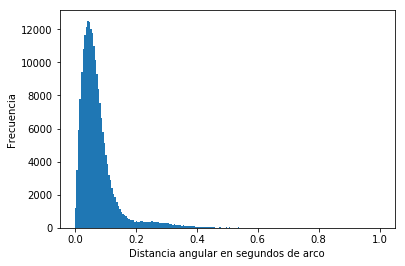

In [57]:
# Qué tan puro fue el cross-match?
freqs, bins, _ = plt.hist(gxm['dist'] / 0.000277777777778, bins=200)
plt.xlabel(r'Distancia angular en segundos de arco')
plt.ylabel(r'Frecuencia')
# plt.yscale('log')
plt.savefig('plots/crossmatch_dist_histogram_arcsec.png', dpi=400)

In the graph above, a slight contamination from a "second" population is visible around 0.3 arcseconds. To get a cleaner database, we should consider dropping objects with more than one match

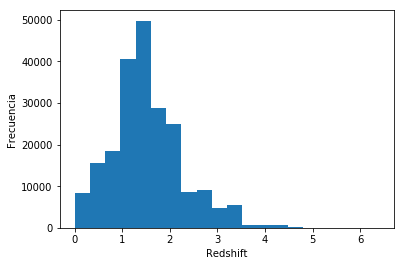

In [74]:
# Visualicemos la distribución de redshifts de la muestra
freqs, bins, _ = plt.hist(gxm['redshift'], bins=20)
plt.xlabel(r'Redshift');
plt.ylabel(r'Frecuencia');

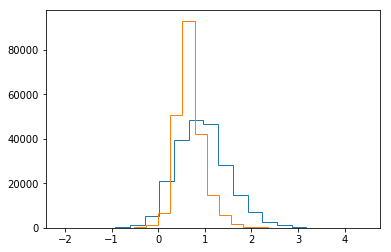

In [48]:
freqs, bins, _ = plt.hist(gxm['bmag']-gxm['rmag'], bins = 20, histtype='step')
freqs, bins, _ = plt.hist(gxm['phot_bp_mean_mag'] - gxm['phot_rp_mean_mag'], bins=20, histtype='step')

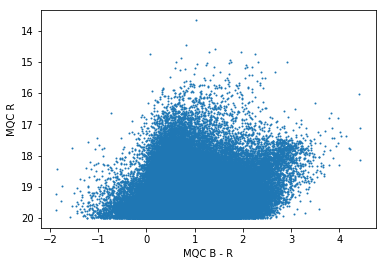

In [67]:
# Color - magnitude diagaram
plt.scatter(gxm['bmag'] - gxm['rmag'], gxm['rmag'], s=1)
plt.xlabel('MQC B - R');
plt.ylabel('MQC R');
plt.gca().invert_yaxis()

There were only 29 multiple matches


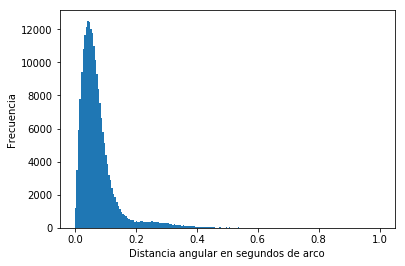

In [14]:
# Find duplicate SDSSJ2000+.. names and keep the nearest 
import astropy.table as table

gxm.sort('dist')

unique_by_name = table.unique(gxm, keys='name', keep='first')
print('There were only {} multiple matches'.format(len(gxm) - len(unique_by_name)))

freqs, bins, _ = plt.hist(gxm['dist'] / 0.000277777777778, bins=200)
plt.xlabel(r'Distancia angular en segundos de arco');
plt.ylabel(r'Frecuencia');

In [77]:
# As the strategy above did not explain the contamination, I shall
# cut the distribution at 0.2"
closest = np.where(gxm['dist'] < 0.2 *0.000277777777778)[0]
gxm2 = gxm[closest]
gxm2

broad_mcqxgaia2_oid,name,ra,dec,rmag,bmag,redshift,broad_type,source_id,phot_rp_mean_mag,phot_bp_mean_mag,dist
,,DEGREE,DEGREE,MAG,MAG,,,,mag,mag,
int32,bytes24,float64,float64,float64,float64,float64,bytes10,int64,float32,float32,float64
10,SDSS J140803.71+433432.4,212.01548,43.57569,14.45,15.27,3.2,Q,1505330997243862656,14.360353,15.1355915,1.4990659065023714e-05
13,SDSS J215055.61+011517.6,327.73174,1.2549,14.6,16.02,2.7,Q,2681706596698739840,15.314851,15.976641,1.5239509442446977e-05
14,SDSS J171938.95+382333.4,259.91229,38.39264,14.67,15.97,3.4,Q,1340514960154622848,14.132372,14.998522,5.023853507749787e-05
15,SDSS J233927.81-001927.7,354.86592,-0.32436,14.67,16.63,3.7,Q,2642791100620451840,15.23926,16.488024,4.9300098464811566e-05
18,SDSS J124334.36+540557.8,190.89319,54.0994,14.76,17.01,3.4,Q,1570810900407257984,15.709311,16.52896,1.9621259935873265e-05
19,SDSS J152328.12+043905.1,230.86718,4.65142,14.76,14.83,3.1,Q,4428522503820615552,14.620478,14.678201,3.989474894481828e-05
24,SDSS J163352.03+000226.1,248.46682,0.04059,14.89,15.6,0.9,Q,4383466853778414720,14.1327715,14.573066,3.514305894617125e-05
26,SDSS J215144.98-004952.8,327.93745,-0.83134,14.93,16.67,2.9,Q,2680804241249498368,14.678741,15.892462,3.630617743643769e-05


The table ``` dr9Xmqcv52_starts_sdss_name.csv``` was generated with the Vizier TAP service after the following query:
```sql
SELECT
    mqc.Name,
    mqc.RAJ2000,
    mqc.DEJ2000, mqc.Rmag,
    mqc.Bmag, mqc.z,
    mqc.Cl,
    dr9.objID,
    dr9.m_SDSS9,
    distance(
    POINT('ICRS', mqc.RAJ2000, mqc.DEJ2000),
    POINT('ICRS', dr9.RA_ICRS, dr9.DE_ICRS)) AS dist
--Note this is the version 5.2 of MQC
FROM "VII/280/catalog" AS mqc, "V/139/sdss9" AS dr9
WHERE 1=CONTAINS(
POINT('ICRS', mqc.RAJ2000, mqc.DEJ2000),
CIRCLE('ICRS', dr9.RA_ICRS, dr9.DE_ICRS, 0.000277777777778) -- 1 arcsecond radius
)
    AND mqc.Name LIKE 'SDSS%' -- only sources with a SDSS name
    AND mqc.Cl LIKE 'Q%' OR mqc.Cl LIKE 'q%' --quasars and photometric quasars
```

In [15]:
dr9xmqc = Table.read('data/dr9Xmqcv52_starts_sdss_name.csv', format='csv')

In [16]:
# A lot of SDSS source can share the same mqc.Name, so the next step is
# filtering duplicates by keeping the nearest match
dr9xmqc.sort('dist')
unique_by_name = table.unique(dr9xmqc, keys='Name', keep='first')
print('There are {} unique sources'.format(len(unique_by_name)))

There are 888633 unique sources


(0, 0.18)

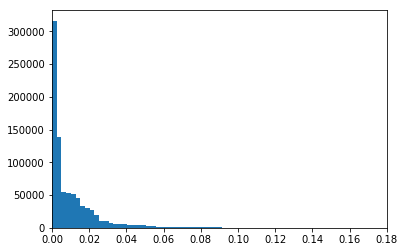

In [115]:
_, _, _ = plt.hist(unique_by_name['dist'] /0.000277777777778, bins=390)
plt.xlim(0, 0.18)

In [18]:
# Some redshifts are NaNs or negative (-1) indicating data not available
# How many rows with proper redshifts we have?
np.where(unique_by_name['z'] > 0)[0].size

863123

The version 5.7 of the Million Quasar catalog is available only via zipped textfile. Astropy methods won't read it so easily because of the missing entries. However, the following excerpt of the Readme explains the fixed width format of the file.

For the ease of reading the file I converted it into a CSV file via the following commands:

In [ ]:
!cat data/milliquas.txt | cut  -b 1-11,13-23,26-50,52-55,57-61,63-67,69-71,73,75,77-82,84-89,91-96,98-100,102-123,125-146,148-169,171-192 --output-delimiter=, > data/milliquas.csv
!echo "ra,dec,name,descrip,rmag,bmag,comment,r,b,z,cite,zcite,qpct,xname,rname,lobe1,lobe2" | cat - data/milliquas.csv > temp && mv temp data/milliquas.csv
!sed -i 's/A,B/AB/g' data/milliquas.csv #A few rows contain this pattern, that will break the loading

In [2]:
milliquas = Table.read('data/milliquas.csv', format='csv')

In [6]:
# How many spectroscopically confirmed quasars from SDSS?
count = 0
for row in milliquas:
    if 'SDSS' in row['name'] and 'Q' in row['descrip']:
        count += 1
print(count)

522186


The spectra used to confirm those quasars, are they from SDSS also?

-------------------------------------------
Instead of messing with multiple crossmatches and id-matches just to get the SDSS quasar spectra IDs and then hopefully download them, it is easier to take a look at the [SDSS DR14 Quasar catalog](https://arxiv.org/abs/1712.05029), which is a list of spectroscopically confirmed quasars within SDSS data and provides pointers to each corresponding spectrum. Most of the confirmed quasars in MILLIQUAS were retrieved from this catalog. 

In [12]:
dr14q = Table.read('data/DR14Q_v4_4.fits')
relevant = dr14q['PLATE', 'MJD', 'FIBERID'] # These numbers are the unique identifiers of an SDSS spectrum
relevant.write('data/speclist.txt', format='ascii')

526356

Using ```awk```, we apply zero-padding to each column to match the specification of the [data model](https://data.sdss.org/datamodel/files/BOSS_SPECTRO_REDUX/RUN2D/spectra/PLATE4/spec.html), also construct the actual filenames
that must be downloaded.

In [10]:
!awk '{printf "%04i/spec-%04i-%05i-%04i.fits\n", $1, $1, $2, $3}' data/speclist.txt  > data/filelist.txt
!sed -i '1d' data/filelist.txt  # Remove first line (all zeros)

In [11]:
!head data/filelist.txt

7596/spec-7596-56945-0162.fits
8740/spec-8740-57367-0694.fits
6177/spec-6177-56268-0595.fits
4415/spec-4415-55831-0464.fits
7666/spec-7666-57339-0121.fits
4354/spec-4354-55810-0678.fits
4354/spec-4354-55810-0646.fits
6110/spec-6110-56279-0086.fits
7595/spec-7595-56957-0273.fits
7850/spec-7850-56956-0711.fits


The following command ([see this guide](https://www.sdss.org/dr15/data_access/bulk/)) will download all the full-size spectra files from DR14Q sources into the ```/path/to/folder``` directory:

```sh
wget  -nd -v -r -nH --cut-dirs=7 \
-i filelist.txt \
-B https://data.sdss.org/sas/dr15/eboss/spectro/redux/v5_10_0/spectra/ -P /path/to/folder
```